<div class="alert alert-info" align = "center"> <h1> LENDING CLUB - Exploratory Data Analysis </h1> </div>

---
---

<a id="content_table"></a>
# <font color=red>Table of contents </font>

<b>[Part 1. Business Understanding](#business_understanding) </b><br>
1.1) Business Objective<br>
1.2) Machine Learning Problem

<b>[Part 2. Setup](#setup)</b><br>
2.1) Configuration<br>
2.2) Librabries<br>

<b>[Part 3. Data Understanding](#data_understanding)</b><br>
3.1) Data Collection<br>
3.2) Data Description<br>
3.3) Data Filteration<br>
3.4) Data Structure<br>

<b>[Part 4. Cleansing data](#data_cleansing)</b><br>

<b>[Part 5. Exploratory Data Analysis](#data_exploration)</b><br>
5.1) Descriptive Statistics<br>
5.2) Examine Missing values<br>
5.3) Train-Test split<br>
5.4) Categorize vars<br>
5.5) Univariate Analysis- Target var<br>
5.6) Univariate Analysis- Discrete vars<br>
5.7) Univariate Analysis- Contionuous vars<br>
5.8) Univariate Analysis- Temporal vars<br>
5.9) Univariate Analysis- Categorical var<br>
5.10) Mutivariate Analysis<br>

<b>[Part 6. Summary](#summary)</b><br>

### References:
1) <a src="https://www.kaggle.com/arthurtok/global-religion-1945-2010-plotly-pandas-visuals"> Global Religion 1945-2010: Plotly & Pandas visuals</a> by Anisotropic <br>

---
---
[content table](#content_table)
<a id="business_understanding"></a>
# <font color=red> 1. Business Understanding

### <font color=blue> 1.1. Introduction and Business Problem
<a id="general_information"></a>

LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform
    
Given historical data on loans with information on whether or not the borrower defaulted (charge-off), can we build a model that can predict whether or not a borrower will pay back their loan? This way in the future when we get a new potential customer we can access whether or not they are likely to pay back the loan.


### <font color=blue> 1.2. Machine Learning Problem
It is a classificaion problem, the project is to employ Machine Learning algorithms to build the predictive model that allows to predict default rate or credit risk probability of a given credit profile

---
---
[content table](#content_table)
<a id="setup"></a>

# <font color=red> 2. Setup

### <font color=blue> 2.1. Import library

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
from pathlib import Path
import os

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Dataframe manipulation
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, Normalizer, scale

# Modelling Helpers:
from sklearn.feature_selection import RFECV
from sklearn import model_selection
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score,ShuffleSplit,cross_validate

# math & statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import math
from math import sqrt

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation metrics for Classification
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report,roc_auc_score,roc_curve,precision_recall_curve,average_precision_score

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

print("Setup complete...")

Setup complete...


### <font color=blue> 2.2. Configuration

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

# Configuration
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

# sns.set(style = 'whitegrid',context = 'notebook')
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### <font color=blue> 2.3. Define utility function

In [3]:
def calculate_class_ratio(data, var):
    class_0 = data[data['Class']==0].groupby(var).count()['Class']
    class_1 = data[data['Class']==1].groupby(var).count()['Class']
    class_ratio = class_1/class_0    
    
    return class_ratio


---
---
[content table](#content_table)
<a id="data_understanding"></a>
# <font color=red> 3. Data Understanding

### <font color=blue> 3.1. Data Collection

There are many LendingClub data sets on Kaggle. This project uses a subset of the Lending Club datatset obtained from this link: https://www.kaggle.com/wordsforthewise/lending-club

#### Load data

In [4]:
data_file = 'loan_data_2007_2014.csv'
df = pd.read_csv(data_file)
print(df.shape)

(466285, 75)


#### Data snapshot

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <font color=blue> 3.2. Data Description
    
The description of each field is found in lending_club_info file

In [6]:
data_file = "lending_club_info.csv"
data_info = pd.read_csv(data_file, index_col='LoanStatNew')
print(data_info.shape)
data_info.head()

(28, 1)


,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade


In [7]:
data_info.loc['loan_status']['Description']

'Current status of the loan'

**Summary**

+ The dataset has 466285 rows, 75 columns
+ Field 'loan_status' can be used as the target of the model as it indicates which loan is default or not or in-progress of payment
+ Many fields that are not necessary for building predictive models such as Unnamed, id, member_id, url, desc. These fields should be excluded from the final dataset
+ It's crucial to specify which loan application are default at the initial state of loan application to help making decision about loan approval. Therefore this analysis only focus on the initial state of a loan, by selecting only features that are relevant to the initial  state of a loan for training the predictive model. The features that may be generated later that reflect loan payment progress are excluded from the model in order to avoiding leaky feature problem

### <font color=blue> 3.3. Select valid data

#### Select features of interest
Here is the list of features selected for building the model as they represent info at the initial loan application:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>delinq_2yrs</td>
      <td>Deliquency rate in the last 2 years</td>
    </tr>
    <tr>
      <th>27</th>
      <td>inq_last_6mths</td>
      <td>Number of inquiries in the last 6 months</td>
    </tr>
  </tbody>
</table>

In [8]:
features = ['loan_amnt','term', 'int_rate','installment','grade', 'sub_grade', 'emp_title', 'emp_length', 
            'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'zip_code', 
            'addr_state', 'dti','earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 
            'total_acc', 'initial_list_status', 'application_type', 'delinq_2yrs', 'inq_last_6mths']

target = 'loan_status'
final_target = 'Class'

all_vars = features + [target]
print(all_vars)
print(len(all_vars))

['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'delinq_2yrs', 'inq_last_6mths', 'loan_status']
28


#### Select valid rows

In [9]:
# inspect target values
df.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Loan_status:
+ 'Fully Paid' means the borrower already paid back the full loan. 
+ 'Charged Off' means the borrowers didn't pay the full loan  
+ 'Default' means the borrower was rejected at the loan application 

=> In order to predict the final status of a loan, the folloing values are selected as label for the model ['Fully Paid',  'Charged Off', 'Default'] .  The remaining status indicates that the borrowers are paying the loan and not the final status, hence, these rows are excluded from the final dataset.  

### <font color=blue> 3.4. Data structure

This method is useful to get a quick description of the data, in particular the total number of rows, and each attributes' type and number of non-null values

In [10]:
df[features + [target]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 28 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            466285 non-null  int64  
 1   term                 466285 non-null  object 
 2   int_rate             466285 non-null  float64
 3   installment          466285 non-null  float64
 4   grade                466285 non-null  object 
 5   sub_grade            466285 non-null  object 
 6   emp_title            438697 non-null  object 
 7   emp_length           445277 non-null  object 
 8   home_ownership       466285 non-null  object 
 9   annual_inc           466281 non-null  float64
 10  verification_status  466285 non-null  object 
 11  issue_d              466285 non-null  object 
 12  purpose              466285 non-null  object 
 13  title                466265 non-null  object 
 14  zip_code             466285 non-null  object 
 15  addr_state       

+ Attributes include numerical, categorical and temporal data type. Temporal data fields earliest_cr_line, issue_d need to be converted to appropriate data type. Each type of data should be investigated with appropriate techniques and plots as well as data preprocessing

---
---
[content table](#content_table)
<a id="data_cleansing"></a>
# <font color=red>4. Cleansing data and construct dataset
    
After investigating data, the following steps applied to in cleansing step: 

1. select vars of interest
2. select valid rows
3. Rename columns from loan_status to Class to indicate label of dataset
4. Convert catetegorical data in 'Class' to numeric data: 1 if the value was Fully Paid or Charged Off, 0 if value was Fully Paid

In [11]:
# Select features of interest
df = df[all_vars]

# Select valid rows: having loan status with the following values
selected_loan_status = ['Fully Paid', 'Charged Off', 'Default']
df = df[df.loan_status.isin(selected_loan_status)]

# Select a subset data (used if the dataset is large)
# df = df.sample(n=200000, random_state=1)

# Rename columns
feature_name = {'loan_status': 'Class'}
df.rename(columns=feature_name, inplace=True)

# Convert data in feature 'Class': 1 if the value was 'Fully Paid' or 'Default', 0 if values was 'Fully Paid'
target_value = {'Fully Paid':0, 'Charged Off':1, 'Default':1}
df.Class = df.Class.map(target_value)

# Remove duplicated rows
df = df.drop_duplicates(keep='last')

# Reset index
df = df.reset_index(drop=True)

print(df.shape)
df.head()

(228046, 28)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,delinq_2yrs,inq_last_6mths,Class
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,credit_card,Computer,860xx,AZ,27.65,Jan-85,3.0,0.0,13648,83.7,9.0,f,INDIVIDUAL,0.0,1.0,0
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,car,bike,309xx,GA,1.00,Apr-99,3.0,0.0,1687,9.4,4.0,f,INDIVIDUAL,0.0,5.0,1
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,small_business,real estate business,606xx,IL,8.72,Nov-01,2.0,0.0,2956,98.5,10.0,f,INDIVIDUAL,0.0,2.0,0
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,other,personel,917xx,CA,20.00,Feb-96,10.0,0.0,5598,21.0,37.0,f,INDIVIDUAL,0.0,1.0,0
4,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,Nov-04,9.0,0.0,7963,28.3,12.0,f,INDIVIDUAL,0.0,3.0,0


After cleasing data, the dataset only consists of 228046 rows and 28 columns, , the dataset is quite medium size

---
---
[content table](#content_table)
<a id="data_exploration"></a>
# <font color=red>5. Exploratory Data Analysis

Exploratory data analysis, also known as EDA, is one of the first major analysis stages in the lifecycle. Here, the main objective is to explore and understand the data in detail. Common techniques used for this stage includes descriptive statistics, plots, charts, and visualizations to look at the various data attributes, find associations and correlations and make a note of data quality problems if any. Following are some of the major tasks in this stage
+ Explore, describe, and visualize data attributes
+ Select data and attributes subsets that seem most important for the problem
+ Extensive analysis to find correlations and associations and test hypotheses
+ Note missing data points, or any data issues

### <font color=blue> 5.1. Descriptice statistics

Descriptive statistics are very useful for initial exploration of the variables.

In [12]:
pd.options.display.float_format = '{:.3f}'.format
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
loan_amnt,228046.000,NaN,NaN,NaN,13464.894,8047.809,500.000,7200.000,12000.000,18000.000,35000.000
term,228046,2,36 months,179046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_rate,228046.000,NaN,NaN,NaN,13.777,4.385,5.420,10.740,13.610,16.450,26.060
installment,228046.000,NaN,NaN,NaN,416.632,243.504,15.690,239.180,365.230,545.330,1408.130
grade,228046,7,B,70268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sub_grade,228046,35,B3,16973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_title,215288,125310,Teacher,1541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emp_length,219325,11,10+ years,68291,NaN,NaN,NaN,NaN,NaN,NaN,NaN
home_ownership,228046,6,MORTGAGE,112371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_inc,228046.000,NaN,NaN,NaN,72011.354,55246.429,3000.000,45000.000,62000.000,86000.000,7141778.000


1. **count**: The following variables have missing data: emp_title, emp_length, title, revol_util
2. **unique entries**: This attribute displays count of unique values for categorical data. In this dataset, varibles have large number of unique values emp_title, title, zip_code. there is only one value for var application_type
3. **freq**: Another piece of information we obtain is the most common category. The most occurence value in emp_title is Teacher, home_ownership is MORTGAGE, purpose is debt_consolidation
4. **count, mean, std, min, max**: The count, mean, min, and max rows are self-explanatory. The std row shows the standard deviation (which measures how dispersed the values are). 
5. **quartile**: The 25%, 50% and 75% rows show the corresponding percentiles: a percentile indidates the value below which a given percentage of observations in a group of observations falls. For example, 50% of the loan_amnt is 12000.000, while 25% are lower than 7200.000 and 75% are lower than 18000.000. These are often called the 25th percentile (or 1st quartile), the median, and the 75th percentile (or 3rd quartile)

### <font color=blue> 5.2. Examine missing values

In [13]:
miss_val_df = pd.DataFrame(df.isnull().sum(), columns=['Count'])
miss_val_df['Percentage'] = 100 * df.isnull().sum()/len(df)
miss_val_df.sort_values('Percentage', ascending=False)

,Count,Percentage
emp_title,12758,5.594
emp_length,8721,3.824
revol_util,186,0.082
title,13,0.006
loan_amnt,0,0.000
dti,0,0.000
inq_last_6mths,0,0.000
delinq_2yrs,0,0.000
application_type,0,0.000
initial_list_status,0,0.000


#### Investigate pattern of missing data

<AxesSubplot:>

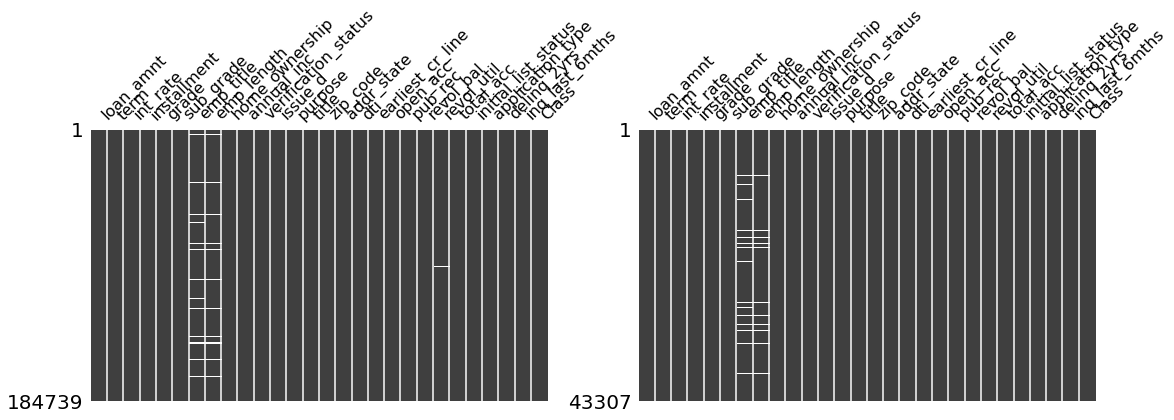

In [14]:
df1 = df.loc[df.Class == 0]
df2 = df.loc[df.Class == 1]

# To ananlyze the type of missing data
import missingno as msno

f, ax = plt.subplots(1, 2, figsize=(18,5))
msno.matrix(df1, figsize=(8,5), ax=ax[0])
msno.matrix(df2, figsize=(8,5), ax=ax[1])

### <font color=blue> 5.3. Train-test split

It may sound strange to set aside part of the data at this stage. After all, you have only taken a quick glance at the data, and surely you should learn a whole lot more about it before you decide what algorithms to use, right? This is true, but your brain is an amazing pattern detection system, which means that it is highly prone to overfitting: if you look at the test set, you may stumple upon some seemingly interesting pattern in the test data that leads you to select a particular kind of Machine Learning model. When you estimate the generalization error using the test set, your estimate will be too optimistic and you will launch a system that will not perform as well as expected. This is called data snooping bias

When creating a test set, in order to generate the same shuffled indices for the next time, we can set the random number generator's seed

In [15]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
train_set = train_set.reset_index(drop=True)
test_set = test_set.reset_index(drop=True)
df_train = train_set.copy()
df_test = test_set.copy()

df_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,delinq_2yrs,inq_last_6mths,Class
0,5000,36 months,12.490,167.250,B,B5,author,1 year,OWN,28000.000,Not Verified,Oct-14,medical,Medical expenses,480xx,MI,20.870,Dec-99,8.000,0.000,4549,64.100,18.000,w,INDIVIDUAL,0.000,1.000,0
1,19375,60 months,22.700,542.860,E,E5,Muckleshoot Gaming Commission,< 1 year,MORTGAGE,150000.000,Verified,Sep-13,medical,Surgery Expenses,980xx,WA,9.200,Jan-03,12.000,0.000,4390,27.600,38.000,w,INDIVIDUAL,1.000,1.000,0
2,10800,60 months,16.200,263.790,C,C4,Murphy Tractor and Equipment Company,10+ years,RENT,60000.000,Source Verified,Sep-13,debt_consolidation,Consolidate,640xx,MO,25.960,Jun-90,8.000,0.000,10923,68.300,31.000,f,INDIVIDUAL,0.000,1.000,0
3,5000,36 months,11.360,164.560,B,B5,Bank of America,< 1 year,RENT,40000.000,Source Verified,May-10,educational,Loan for MBA at Texas Tech University,342xx,FL,11.420,Mar-02,10.000,0.000,4208,50.700,17.000,f,INDIVIDUAL,0.000,2.000,0
4,10000,60 months,16.450,245.580,E,E1,johns hopkins hospital,6 years,RENT,55000.000,Not Verified,Jun-10,major_purchase,miracle,212xx,MD,8.930,Aug-94,4.000,0.000,8045,79.700,9.000,f,INDIVIDUAL,0.000,0.000,0


### <font color=blue> 5.4. Categorize vars

In [16]:
## target
target = ['Class']
print("\nTarget var: ", target)

## text vars
text_vars = []
print("\nText vars: ", text_vars)
print('There are {} Text variables'.format(len(text_vars)))

# date time vars
datetime_vars = ['issue_d', 'earliest_cr_line']
# datetime_vars = [var for var in df.columns if df[var].dtypes == '<M8[ns]']
print("\nDateTime vars: ", datetime_vars)
print('There are {} DateTime variables'.format(len(datetime_vars)))

## cat vars
cat_vars = [var for var in df_train.columns if df_train[var].dtypes == 'O' if var not in target + text_vars + datetime_vars]
print("\nCategorical vars: ", cat_vars)
print('There are {} categorical variables'.format(len(cat_vars)))

num_vars = [var for var in df_train.columns if df_train[var].dtypes != 'O' if var not in target]
print("\nNumerical vars: ", num_vars)
print('There are {} numerical variables'.format(len(num_vars)))

dis_vars = [var for var in num_vars if len(df_train[var].unique()) < 30]
print("\nDiscrete vars: ", dis_vars)
print('There are {} numerical variables'.format(len(dis_vars)))

cont_vars = [var for var in num_vars if var not in dis_vars]
print("\nContinous vars: ", cont_vars)
print('There are {} numerical variables'.format(len(cont_vars)))


Target var:  ['Class']

Text vars:  []
There are 0 Text variables

DateTime vars:  ['issue_d', 'earliest_cr_line']
There are 2 DateTime variables

Categorical vars:  ['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']
There are 13 categorical variables

Numerical vars:  ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'delinq_2yrs', 'inq_last_6mths']
There are 12 numerical variables

Discrete vars:  ['pub_rec', 'delinq_2yrs', 'inq_last_6mths']
There are 3 numerical variables

Continous vars:  ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']
There are 9 numerical variables


There are 4 types of data: numerical, categorical, text, temporal

### <font color=blue> 5.5. Univariate Analysis - Examine Target variable

In [17]:
df_train['Class'].unique()

array([0, 1], dtype=int64)

#### Check balance between 2 classes

[Text(0, 0.5, 'Count')]

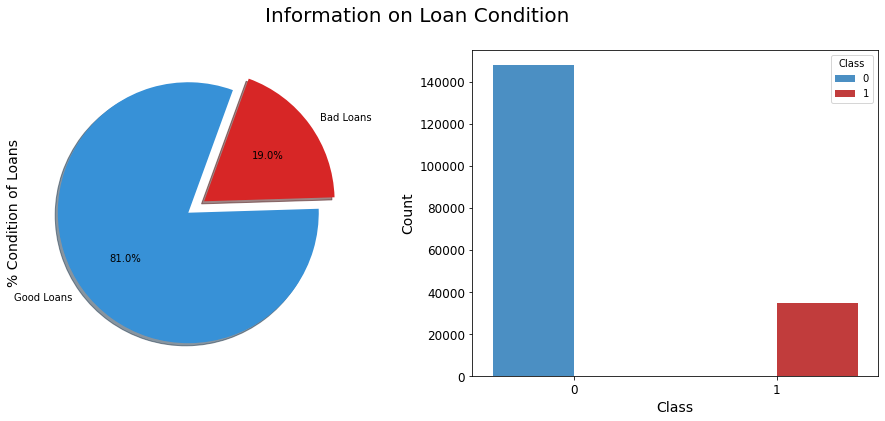

In [18]:
f, ax = plt.subplots(1,2,figsize=(16,6))

colors = ['#3791D7','#D72626']
labels = ['Good Loans', 'Bad Loans']

plt.suptitle('Information on Loan Condition', fontsize=20)
df_train['Class'].value_counts().plot.pie(explode=[0,0.15], autopct='%1.1f%%', ax=ax[0], shadow=True,
                                         colors=colors, labels=labels, fontsize=10, startangle=70)
ax[0].set_ylabel('% Condition of Loans', fontsize=14)
sns.countplot(x='Class', data=df_train, palette=colors, hue='Class')
ax[1].set(ylabel="Count")

This is an unbalanced or imbalanced problem. Notice that there are a lot more entries of people that fully paid off their loans than people that did not pay back. This is really common for classificaion problems that have to do with fraud or spam. That means we can expect to probably do very well in terms of accuracy but our precision and recall are going to be the true metrics that we'll have to evaluate our model. We should expect to perform that well on those metrics due to the fact that we have a very imbalanced dataset here.

### <font color=blue> 5.6. Univariate Analysis - Examine Discrete vars

#### Show discreate vars

In [19]:
df_train[dis_vars].head()

,pub_rec,delinq_2yrs,inq_last_6mths
0,0.000,0.000,1.000
1,0.000,1.000,1.000
2,0.000,0.000,1.000
3,0.000,0.000,2.000
4,0.000,0.000,0.000


#### delinq_2yrs

In [20]:
df_train['delinq_2yrs'].value_counts()

0.000     153688
1.000      19901
2.000       5512
3.000       1798
4.000        715
5.000        394
6.000        175
7.000         99
8.000         57
9.000         34
10.000        18
12.000        14
11.000        14
14.000         4
15.000         3
13.000         3
18.000         3
19.000         1
16.000         1
17.000         1
29.000         1
Name: delinq_2yrs, dtype: int64

One notice here is most of values of delinq_2yrs are 0, and only small parts larger than 0. Each of non-zero value has a small portion, hence the sample size is very small and not sufficient to draw conclusions about the difference in default rate for each categorical value. 

It may be better to create a binary value with 0 representing the orginal data less than 2  (which means zero or low delinquency value), and 1 other wise. This is because with 2, the difference in proportion between the 2 classes are larger than 0 or 1

In [21]:
df_train['delinq_2yrs'] = df_train[['delinq_2yrs']].applymap(lambda x:0 if x<=2 else 1)
df_train.delinq_2yrs.value_counts()

0    179101
1      3335
Name: delinq_2yrs, dtype: int64

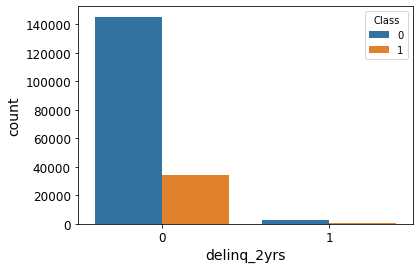

In [22]:
sns.countplot(x='delinq_2yrs', data=df_train, hue='Class')
plt.show()

=> From the plot, it's hard to assess if there is differences in the proportion of two classes for all values. To see it more clearly, we can calculate the ratio of default class vs. pay off class

compare default rate for each value of delinq_2yrs_bin

In [23]:
delinq_2yrs_df = df_train[df_train['Class']==1].groupby('delinq_2yrs')['Class'].count()
delinq_2yrs_fp = df_train[df_train['Class']==0].groupby('delinq_2yrs')['Class'].count()
delinq_2yrs_ratio = delinq_2yrs_df/delinq_2yrs_fp
delinq_2yrs_ratio

delinq_2yrs
0   0.233
1   0.302
Name: Class, dtype: float64

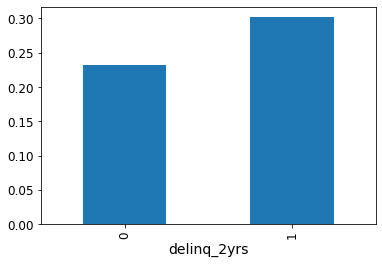

In [24]:
delinq_2yrs_ratio.plot(kind='bar')
plt.show()

#### inq_last_6mths

In [25]:
# check unique values
df_train['inq_last_6mths'].value_counts()

0.000    88047
1.000    52546
2.000    25648
3.000    12034
4.000     2651
5.000     1040
6.000      418
7.000       37
8.000       15
Name: inq_last_6mths, dtype: int64

=> Most of values fall in the range from 0 to 3

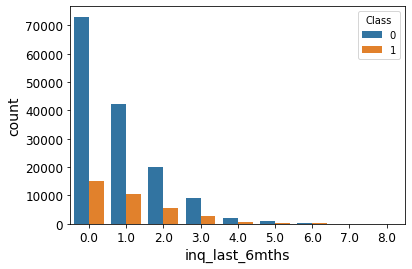

In [26]:
# Compare distribution among values of inq_last_6mths
sns.countplot(x='inq_last_6mths', data=df_train, hue='Class')
plt.show()

=> From the plot, it's hard to assess if there is differences in the proportion of two classes for all values. To see it more clearly, we can calculate the ratio of default class vs. pay off class

In [27]:
inq_last_6mths_df = df_train[df_train['Class']==1].groupby('inq_last_6mths')['Class'].count()
inq_last_6mths_fp = df_train[df_train['Class']==0].groupby('inq_last_6mths')['Class'].count()
inq_last_6mths_ratio = inq_last_6mths_df/inq_last_6mths_fp
inq_last_6mths_ratio

inq_last_6mths
0.000   0.204
1.000   0.245
2.000   0.275
3.000   0.307
4.000   0.308
5.000   0.298
6.000   0.370
7.000   0.370
8.000   0.154
Name: Class, dtype: float64

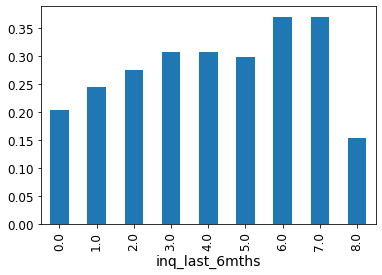

In [28]:
inq_last_6mths_ratio.plot(kind='bar')
plt.show()

=> There is slight increase in the default ratio as inq_last_6mths increases, except that the ratio is much smaller for value of 8. This can be explain due to small sample size (only 15 cases of value 8 and 37 cases of value 7 compared to 88047 cased of values 0). This indicates this feature can be helpful to inform the status of target var in the predictive model. To give a better pattern of this feature, considering combining values of 7 and 8 into value of 6

In [29]:
df_train['inq_last_6mths'] = df_train[['inq_last_6mths']].applymap(lambda x: x if x<6 else 6)

inq_last_6mths_df = df_train[df_train['Class']==1].groupby("inq_last_6mths").count()['Class']
inq_last_6mths_fp = df_train[df_train['Class']==0].groupby("inq_last_6mths").count()['Class']
inq_last_6mths_ratio = inq_last_6mths_df/inq_last_6mths_fp
inq_last_6mths_ratio

inq_last_6mths
0.000   0.204
1.000   0.245
2.000   0.275
3.000   0.307
4.000   0.308
5.000   0.298
6.000   0.362
Name: Class, dtype: float64

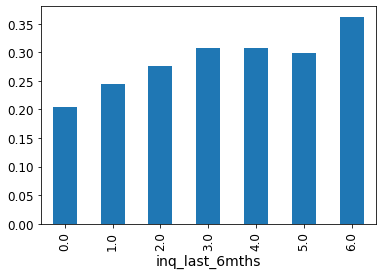

In [30]:
inq_last_6mths_ratio.plot(kind='bar')
plt.show()

#### pub_rec

In [31]:
# check unique values
df_train['pub_rec'].value_counts()

0.000     161594
1.000      18570
2.000       1604
3.000        412
4.000        137
5.000         61
6.000         30
7.000         14
8.000          5
9.000          4
10.000         4
11.000         1
Name: pub_rec, dtype: int64

=> Most of observations fall in the range from 0 to 3

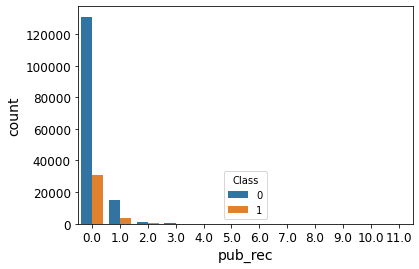

In [32]:
sns.countplot(x='pub_rec', data=df_train, hue='Class')
plt.show()

In [33]:
pub_rec_df = df_train[df_train['Class']==1].groupby("pub_rec").count()['Class']
pub_rec_fp = df_train[df_train['Class']==0].groupby("pub_rec").count()['Class']
pub_rec_ratio = pub_rec_df/pub_rec_fp
pub_rec_ratio

pub_rec
0.000    0.233
1.000    0.241
2.000    0.270
3.000    0.234
4.000    0.370
5.000    0.326
6.000    0.304
7.000    0.400
8.000      NaN
9.000    0.333
10.000     NaN
11.000     NaN
Name: Class, dtype: float64

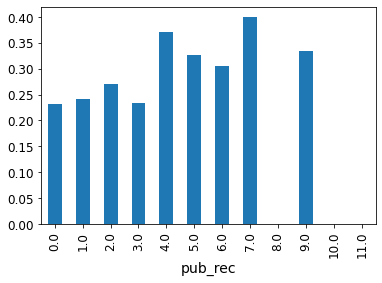

In [34]:
pub_rec_ratio.plot(kind='bar')
plt.show()

=> It seems that, values from 0 to 3 have similar proportion between default/fully-paid, and values from 4 to 6 have similar proportion. Values from 7 to 11 is not reliable enough due to small sample size. This allows us to consider using a binary value to indicate two states of this variable: 0 if the value <= 3, 1 otherwise

In [35]:
df_train['pub_rec_bin'] = df_train[['pub_rec']].applymap(lambda x:0 if x<=3 else 1)

pub_rec_bin_co = df_train[df_train['Class']==1].groupby("pub_rec_bin").count()['Class']
pub_rec_bin_fp = df_train[df_train['Class']==0].groupby("pub_rec_bin").count()['Class']
pub_rec_bin_ratio = pub_rec_bin_co/pub_rec_bin_fp
pub_rec_bin_ratio

pub_rec_bin
0   0.234
1   0.333
Name: Class, dtype: float64

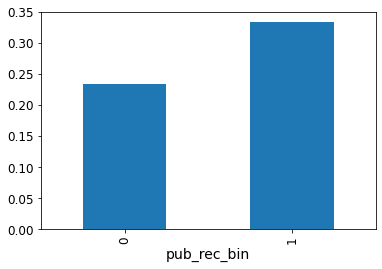

In [36]:
pub_rec_bin_ratio.plot(kind='bar')
plt.show()

=> It can be seen from the plot that pub_rec_bin of 1 is more likely to  be default than pub_rec_bin of 0, hence this feature may contribute to predict the pattern of default loan

### <font color=blue> 5.7. Univariate Analysis - Examine Continuous vars

#### Examine distribution of each var

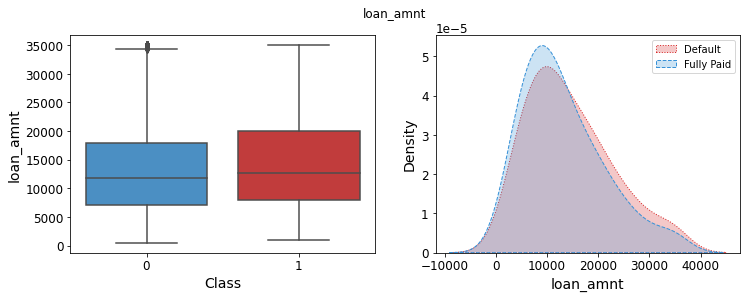

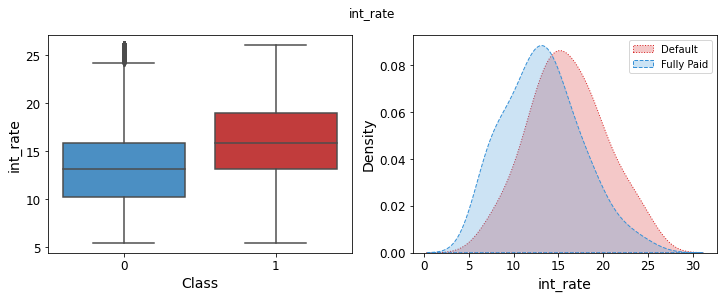

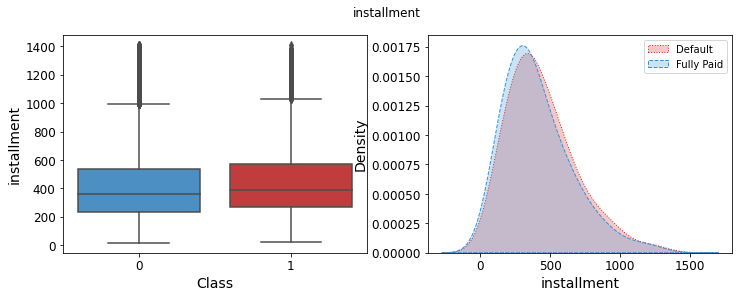

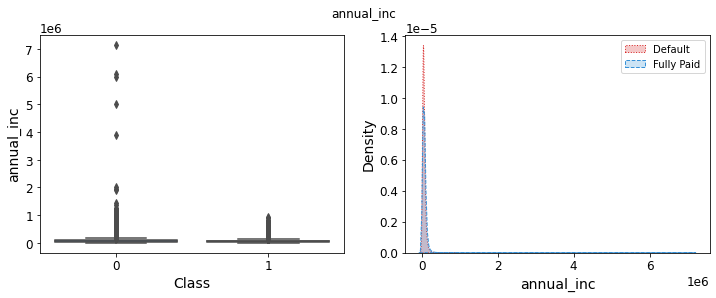

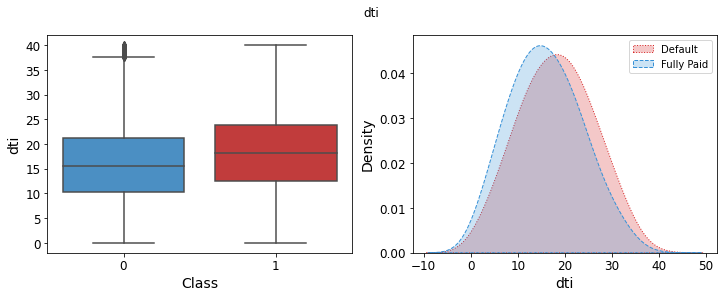

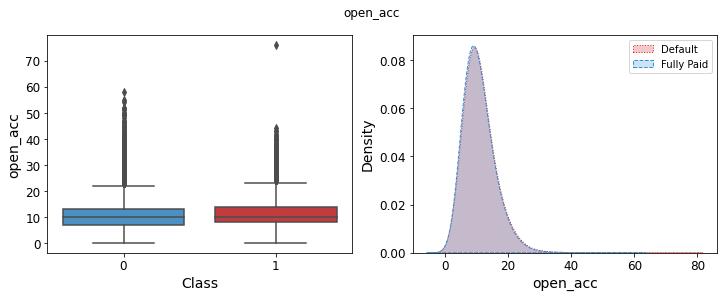

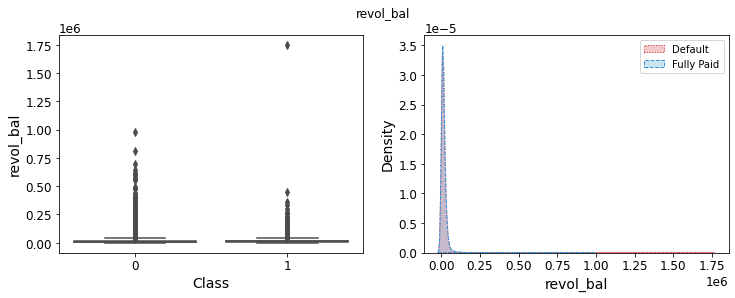

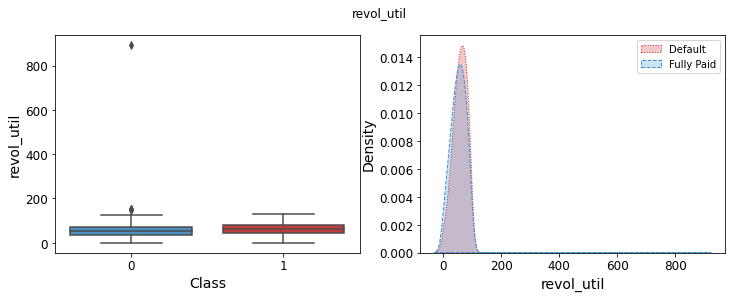

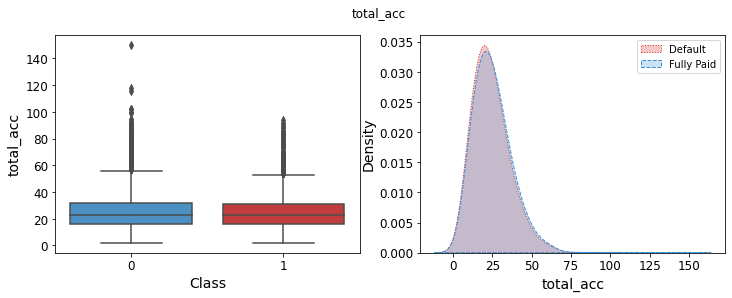

In [37]:
c1_df = df_train.loc[df_train.Class==1,:]
c0_df = df_train.loc[df_train.Class==0,:]
colors = ['#3791D7','#D72626']

for column in cont_vars:
    plt.figure(figsize=[12,4])
    plt.suptitle(column, fontsize=12)
    plt.subplot(121)
    sns.boxplot(x='Class', y=column, data=df_train, palette=colors)
    plt.subplot(122)
    sns.kdeplot(c1_df[column], bw=0.4, label='Default', shade=True, color='#D72626', linestyle=":")
    sns.kdeplot(c0_df[column], bw=0.4, label='Fully Paid', shade=True, color='#3791D7', linestyle="--")
    plt.legend()
    plt.show()

1. It can be seen from the plot that **int_rate** and **dti** have the distributions of 2 classes are quite different, with mean of class 1 is higher than mean of class 0. This indicates these 2 features may be important features to predict default observation

2. Distribution of features **Installment, loan_amount, open_acc, total_acc** are quite similar between the two classes

3. Some variables such as **annual_inc, revol_bal, revol_util** are heavily skewed which makes it hard to inspect the distribution between two classes, we can set the lower threshold and upper threshold for observations with outliers to inspect pattern more clearly

In [38]:
def find_skewed_boundaries(var, distance):
    # distance passed as an argument, give us the option 
    # to estimate 1.5 times or 3 times the IQR to calculate the boundaries
    IQR = var.quantile(0.75) - var.quantile(0.25) 
    lower_boundary = var.quantile(0.25) - (IQR * distance)
    upper_boundary = var.quantile(0.75) + (IQR * distance)
    
    print('upper_boundary, lower_boundary: ', upper_boundary, lower_boundary)
    print('total number of var: {}'.format(len(var)))
    print('number of data points with more than upper_boundary (right end outliers): {}'.format(
        (var > upper_boundary).sum()))
    print('number of data points with less than lower_boundary (left end outliers: {}'.format(
        (var < lower_boundary).sum()))
    print('% right end outliers: {}'.format((var > upper_boundary).sum() / len(var)))
    print('% left end outliers: {}'.format((var < lower_boundary).sum() / len(var)))
    
    return upper_boundary, lower_boundary

In [39]:
df_temp = df_train.copy()
outlier_vars = ['annual_inc', 'revol_bal', 'revol_util']
for var in outlier_vars:
    print()
    print(var)
    upper_boundary, lower_boundary = find_skewed_boundaries(df_temp[var], 4)
    df_temp.loc[df_temp[var] <= lower_boundary, var] = lower_boundary
    df_temp.loc[df_temp[var] >= upper_boundary, var] = upper_boundary


annual_inc
upper_boundary, lower_boundary:  250000.0 -119000.0
total number of var: 182436
number of data points with more than upper_boundary (right end outliers): 1249
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.006846236488412375
% left end outliers: 0.0

revol_bal
upper_boundary, lower_boundary:  71381.0 -46411.0
total number of var: 182436
number of data points with more than upper_boundary (right end outliers): 2183
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.01196584007542371
% left end outliers: 0.0

revol_util
upper_boundary, lower_boundary:  223.5 -112.19999999999999
total number of var: 182436
number of data points with more than upper_boundary (right end outliers): 1
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 5.481374290162029e-06
% left end outliers: 0.0


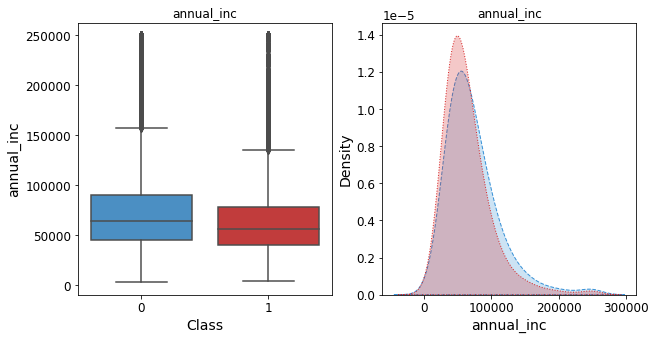

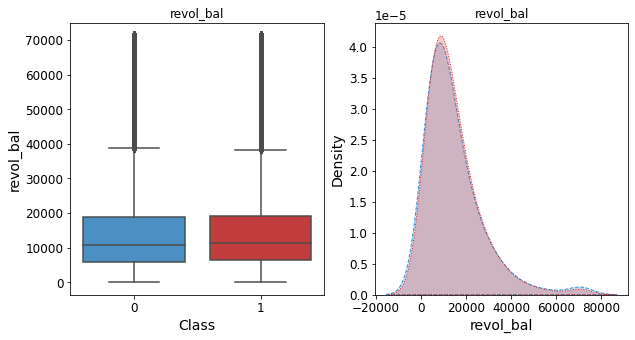

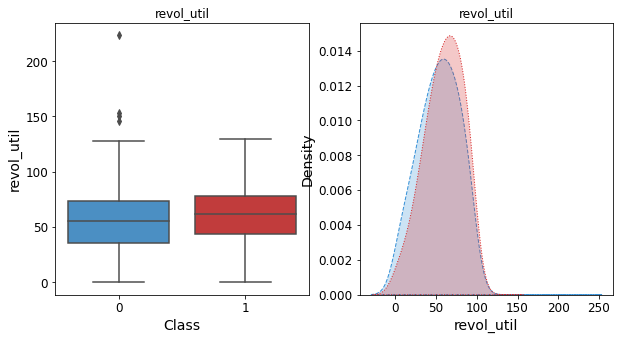

In [40]:
c0_df = df_temp.loc[df_temp.Class == 1,:]
c1_df =  df_temp.loc[df_temp.Class == 0,:]
colors = ['#3791D7','#D72626']

for column_header in outlier_vars:    
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column_header,data=df_temp,palette=colors)
    plt.title(column_header, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(c1_df[column_header], bw = 0.4, label = "Fully Paid", shade=True, color='#3791D7', linestyle="--")
    sns.kdeplot(c0_df[column_header], bw = 0.4, label = "Charged Off", shade=True, color= '#D72626', linestyle=":")
    plt.title(column_header, fontsize=12)
    plt.show()

The distributions between 2 classes are quite similar, almost no distinguish between 2 classes

We can print descriptive statistics of each class for each feature to get more detail

In [41]:
for col in cont_vars:
    print('------------------------------------------------------------------------')
    print(col)
    print('------------------------------------------------------------------------')
    print(df_train.groupby(['Class'])[col].describe())

------------------------------------------------------------------------
loan_amnt
------------------------------------------------------------------------
           count      mean      std      min      25%       50%       75%       max
Class                                                                              
0     147845.000 13209.454 7950.651  500.000 7100.000 11750.000 18000.000 35000.000
1      34591.000 14544.227 8355.983 1000.000 8000.000 12625.000 20000.000 35000.000
------------------------------------------------------------------------
int_rate
------------------------------------------------------------------------
           count   mean   std   min    25%    50%    75%    max
Class                                                          
0     147845.000 13.256 4.245 5.420 10.160 13.110 15.800 26.060
1      34591.000 16.005 4.286 5.420 13.110 15.800 18.920 26.060
------------------------------------------------------------------------
installment
------------

### <font color=blue> 5.8. Univariate Analysis - Explore categorical variables

#### List all categorical variables 

In [42]:
print(cat_vars)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code', 'addr_state', 'initial_list_status', 'application_type']


In [43]:
df_train[cat_vars].head()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,purpose,title,zip_code,addr_state,initial_list_status,application_type
0,36 months,B,B5,author,1 year,OWN,Not Verified,medical,Medical expenses,480xx,MI,w,INDIVIDUAL
1,60 months,E,E5,Muckleshoot Gaming Commission,< 1 year,MORTGAGE,Verified,medical,Surgery Expenses,980xx,WA,w,INDIVIDUAL
2,60 months,C,C4,Murphy Tractor and Equipment Company,10+ years,RENT,Source Verified,debt_consolidation,Consolidate,640xx,MO,f,INDIVIDUAL
3,36 months,B,B5,Bank of America,< 1 year,RENT,Source Verified,educational,Loan for MBA at Texas Tech University,342xx,FL,f,INDIVIDUAL
4,60 months,E,E1,johns hopkins hospital,6 years,RENT,Not Verified,major_purchase,miracle,212xx,MD,f,INDIVIDUAL


#### Count unique values of each categorical variables

In [44]:
cat_feature_df = pd.DataFrame(columns=['Feature', 'count_distinct_value'])
for e in cat_vars:
    count_distinct = df_train[e].nunique()
    cat_feature_df = cat_feature_df.append({'Feature':e, 'count_distinct_value':count_distinct}, ignore_index=True)
    
cat_feature_df.sort_values('count_distinct_value', ascending=False)

,Feature,count_distinct_value
3,emp_title,103492
8,title,39649
9,zip_code,863
10,addr_state,50
2,sub_grade,35
7,purpose,14
4,emp_length,11
1,grade,7
5,home_ownership,6
6,verification_status,3


#### Inspect unique values for each categorical vars having small number of unqiue values to see if they are appropriate or having data issues

In [45]:
# only consider categorical vars with num of unique values less than or equal to 20
removed_list = ['emp_title','title', 'zip_code', 'addr_state']
selected_list = [e for e in cat_vars if e not in removed_list]

def analyse_frequency_labels(df, var):
    data = df.copy()
    tmp = data[var].value_counts() / len(data)
    return tmp

for var in selected_list:
    print(var)
    print(analyse_frequency_labels(df_train, var))
    print()

term
 36 months   0.785
 60 months   0.215
Name: term, dtype: float64

grade
B   0.309
C   0.254
A   0.171
D   0.158
E   0.072
F   0.029
G   0.007
Name: grade, dtype: float64

sub_grade
B3   0.075
B4   0.069
B2   0.059
C1   0.059
B5   0.057
C2   0.056
C3   0.049
B1   0.049
A5   0.048
C4   0.047
A4   0.045
C5   0.043
D1   0.039
D2   0.036
D3   0.031
A3   0.029
D4   0.029
A2   0.025
A1   0.024
D5   0.024
E1   0.017
E2   0.017
E3   0.014
E4   0.013
E5   0.011
F1   0.008
F2   0.007
F3   0.006
F4   0.005
F5   0.004
G1   0.003
G2   0.002
G3   0.001
G4   0.001
G5   0.001
Name: sub_grade, dtype: float64

emp_length
10+ years   0.300
2 years     0.093
< 1 year    0.082
3 years     0.081
5 years     0.072
1 year      0.067
4 years     0.065
6 years     0.060
7 years     0.057
8 years     0.046
9 years     0.038
Name: emp_length, dtype: float64

home_ownership
MORTGAGE   0.492
RENT       0.423
OWN        0.084
OTHER      0.001
NONE       0.000
ANY        0.000
Name: home_ownership, dtype: float64

=> It seems that the data is appropriate, go to check each value for making further decision in processing and engineering steps

#### term

In [46]:
df_train['term'].value_counts()

 36 months    143160
 60 months     39276
Name: term, dtype: int64

=> terms'smeaning is numeric data, hence need to transform this feature in processing step

In [47]:
# Convert categorical var to numeric var
term_mapping = {'36 months': 36, '60 months': 60}
df_train['term'] = df_train.term.astype(str)
df_train['term'] = df_train.term.apply(lambda x: x.strip())
df_train['term_num'] = df_train.term.map(term_mapping)

df_test['term'] = df_test.term.astype(str)
df_test['term'] = df_test.term.apply(lambda x: x.strip())
df_test['term_num'] = df_test.term.map(term_mapping)

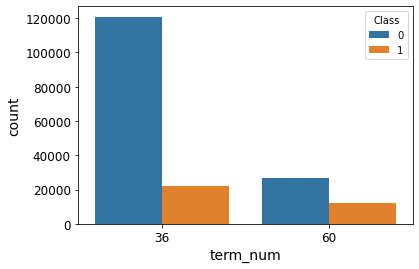

In [48]:
sns.countplot(x='term_num', data=df_train, hue='Class')
plt.show()

In [49]:
# calculate count of unique value in each class, then the ratio between default vs. fullpay for each  unique value
term_df = df_train[df_train['Class']==1].groupby("term_num").count()['Class']
term_fp = df_train[df_train['Class']==0].groupby("term_num").count()['Class']
term_ratio = term_df/term_fp
term_ratio

term_num
36   0.184
60   0.456
Name: Class, dtype: float64

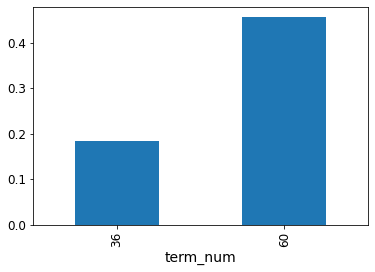

In [50]:
term_ratio.plot(kind='bar')
plt.show()

=> important feature, people with term of 60 months are more likely to being charged off

#### grade & sub_grade

check unique values of grade

In [51]:
sorted(df_train['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

Create a countplot per grade. Set the hue to the loan_status label

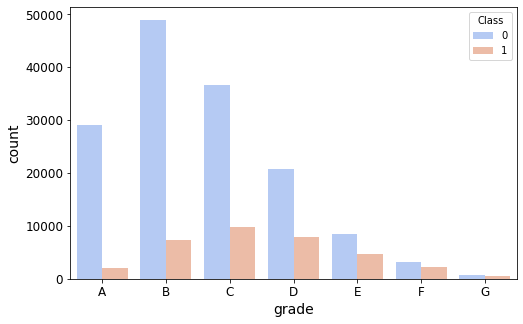

In [52]:
# sort grade to display grade with ordering
grade_order = sorted(df_train['grade'].unique())
plt.figure(figsize=(8,5))
sns.countplot(x='grade', data=df_train, order=grade_order, palette='coolwarm', hue='Class')
plt.show()

In [53]:
# calculate count of unique value in each class, then the ratio between default vs. fullpay for each  unique value
grade_df = df_train[df_train['Class']==1].groupby("grade").count()['Class']
grade_fp = df_train[df_train['Class']==0].groupby("grade").count()['Class']
grade_ratio = grade_df/grade_fp
grade_ratio

grade
A   0.071
B   0.151
C   0.266
D   0.381
E   0.556
F   0.691
G   0.769
Name: Class, dtype: float64

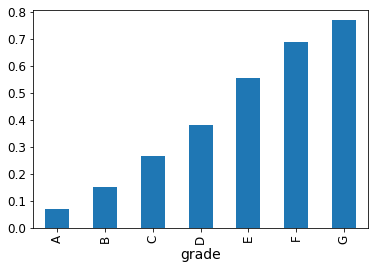

In [54]:
grade_ratio.plot(kind='bar')
plt.show()

=> It looks like the best customers are given a grade of A, second best given a grade of B, C, D etc. Grade is an important feature

#### sub_grade

Explore loans per sub_grade based on the loan_status

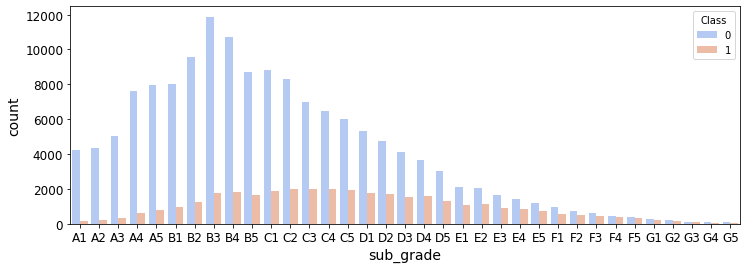

In [55]:
subgrade_order = sorted(df['sub_grade'].unique())
plt.figure(figsize=(12,4))
sns.countplot(x='sub_grade', data=df_train, order=subgrade_order, palette='coolwarm', hue='Class')
plt.show()

It looks like F and G subgrades don't get paid back that often. Isolate those and recreate the count plot just for those subgrades

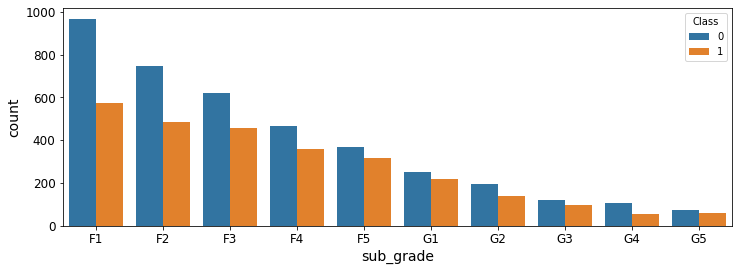

In [56]:
f_and_g = df_train[(df_train['grade']=='G') | (df_train['grade']=='F')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade', data=f_and_g, order=subgrade_order, hue='Class')
plt.show()

In [57]:
subgrade_df = df_train[df_train['Class']==1].groupby("sub_grade").count()["Class"]
subgrade_fp = df_train[df_train['Class']==0].groupby("sub_grade").count()["Class"]
subgrade_ratio = subgrade_df/subgrade_fp

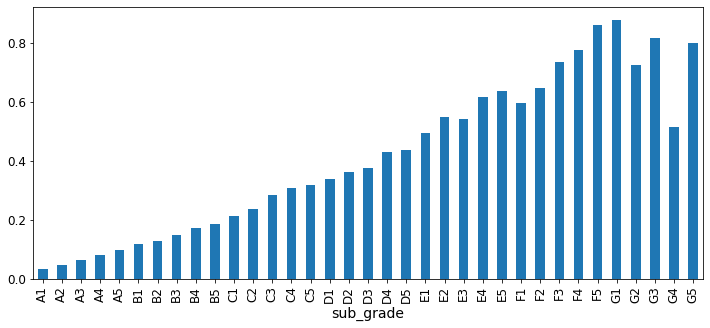

In [58]:
plt.figure(figsize=(12,5))
subgrade_ratio.plot(kind='bar')
plt.show()

=> Grade and sub_grade provide the same information, but sub_grade provides more detail, can use grade or sub_grade for the predictive model

#### emp_length feature

Convert emp_length to num

In [59]:
df_train['num_emp_length'] = df_train['emp_length'].map({'10+ years':10, 
                                         '9 years':9, 
                                         '8 years':8,
                                         '7 years':7,
                                         '6 years':6,
                                         '5 years':5,
                                         '4 years':4,
                                         '3 years':3,
                                         '2 years':2,
                                         '1 year':1,
                                         '< 1 year':0.5})
df_train['num_emp_length'] = df_train['num_emp_length'].fillna(0)

In [60]:
df_train['num_emp_length'].value_counts()

10.000    54738
2.000     17003
0.500     15018
3.000     14751
5.000     13200
1.000     12230
4.000     11880
6.000     11028
7.000     10395
8.000      8381
0.000      6948
9.000      6864
Name: num_emp_length, dtype: int64

what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan. 

In [61]:
emp_df = df_train[df_train['Class']==1].groupby("num_emp_length").count()['Class']
emp_fp = df_train[df_train['Class']==0].groupby("num_emp_length").count()['Class']
emp_len = emp_df/emp_fp
emp_len

num_emp_length
0.000    0.364
0.500    0.240
1.000    0.221
2.000    0.223
3.000    0.228
4.000    0.217
5.000    0.227
6.000    0.237
7.000    0.235
8.000    0.241
9.000    0.242
10.000   0.228
Name: Class, dtype: float64

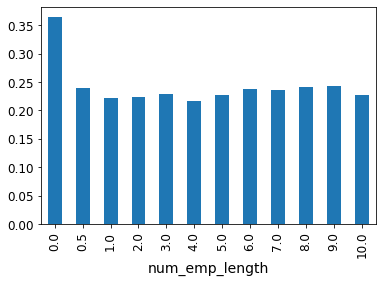

In [62]:
emp_len.plot(kind='bar')
plt.show()

=> Charged off rates are quite similar across all employment lengths, except for emp_length=0 

#### Title and purpose

Review the title column and purpose column. Is this repeated information?

In [63]:
df_train['purpose'].head(10)

0               medical
1               medical
2    debt_consolidation
3           educational
4        major_purchase
5           credit_card
6           credit_card
7    debt_consolidation
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [64]:
df_train['title'].head(10)

0                         Medical expenses
1                         Surgery Expenses
2                              Consolidate
3    Loan for MBA at Texas Tech University
4                                  miracle
5                          TSP Payoff Loan
6                         PAY CREDIT CARDS
7                            DebtReduction
8                       Debt consolidation
9                       Debt consolidation
Name: title, dtype: object

=> The title column is simply a string subcategory/description of the purpose column. Remove this column in the preprocessing step

In [65]:
df_train['purpose'].value_counts()

debt_consolidation    106131
credit_card            36621
home_improvement       10607
other                  10308
major_purchase          4598
small_business          3599
car                     2738
medical                 2058
wedding                 1571
moving                  1444
house                   1176
vacation                1130
educational              252
renewable_energy         203
Name: purpose, dtype: int64

Text(0, 0.5, 'Number of customers')

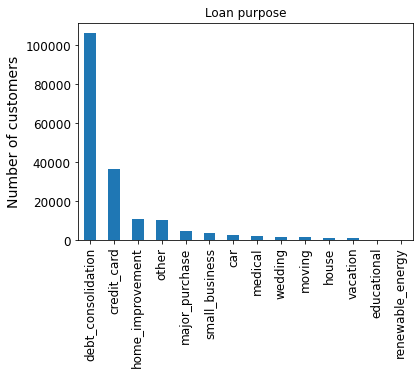

In [66]:
fig = df_train['purpose'].value_counts().plot.bar()
fig.set_title('Loan purpose')
fig.set_ylabel('Number of customers')

The majority of the borrowers intend to use the loan for 'debt consolidation' or to repay their 'credit cards'. This is quite common. What the borrowers intend to do is, to consolidate all the debt that they have on different financial items, in on single debt, the new loan that they will take from Lending Club in this case. This loan will usually provide an advantage to the borrower, either in the form of lower interest rates than a credit card, for example, or longer repayment period.

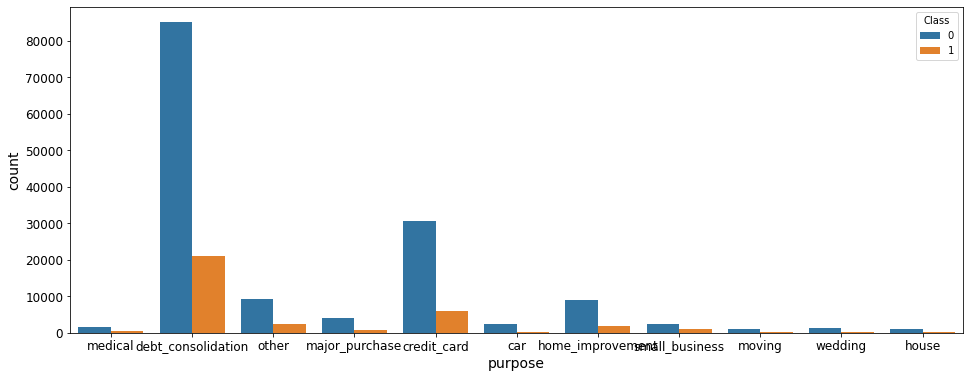

In [67]:
df_train['purpose']=df_train['purpose'].replace(['educational', 'renewable_energy', 'vacation'], 'other')
plt.figure(figsize=(16,6))
sns.countplot(x='purpose', data=df_train, hue='Class')
plt.show()

In [68]:
purpose_df = df_train[df_train['Class']==1].groupby("purpose").count()['Class']
purpose_fp = df_train[df_train['Class']==0].groupby("purpose").count()['Class']
purpose_ratio = purpose_df/purpose_fp
purpose_ratio

purpose
car                  0.144
credit_card          0.197
debt_consolidation   0.248
home_improvement     0.195
house                0.220
major_purchase       0.166
medical              0.269
moving               0.277
other                0.266
small_business       0.428
wedding              0.163
Name: Class, dtype: float64

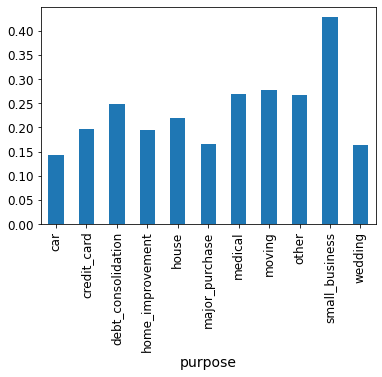

In [69]:
purpose_ratio.plot(kind='bar')
plt.show()

#### home_ownership

In [70]:
df_train['home_ownership'].value_counts()

MORTGAGE    89836
RENT        77083
OWN         15372
OTHER         109
NONE           35
ANY             1
Name: home_ownership, dtype: int64

=> Replace NONE and ANY with OTHER in the preprocessing step

In [71]:
df_train['home_ownership'] = df_train['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')
ownership_df = df_train[df_train['Class']==1].groupby("home_ownership").count()['Class']
ownership_fp = df_train[df_train['Class']==0].groupby("home_ownership").count()['Class']
ownership_ratio = ownership_df/ownership_fp
ownership_ratio

home_ownership
MORTGAGE   0.205
OTHER      0.198
OWN        0.247
RENT       0.267
Name: Class, dtype: float64

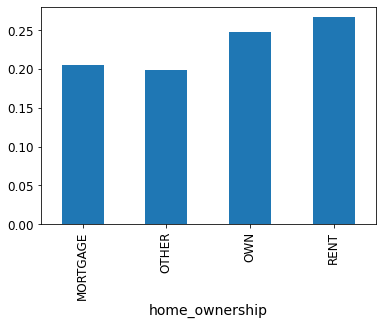

In [72]:
ownership_ratio.plot(kind='bar')
plt.show()

#### 'verification_status', 'initial_list_status'


verification_status
Verified           68002
Not Verified       63467
Source Verified    50967
Name: verification_status, dtype: int64


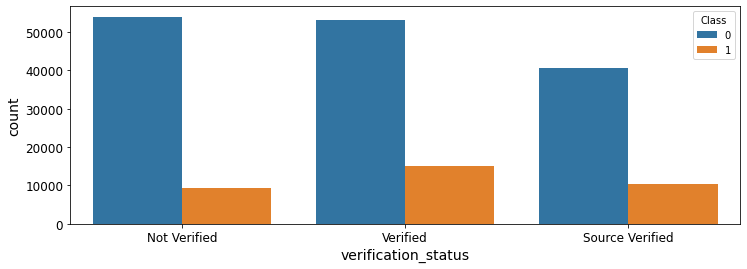


initial_list_status
f    136376
w     46060
Name: initial_list_status, dtype: int64


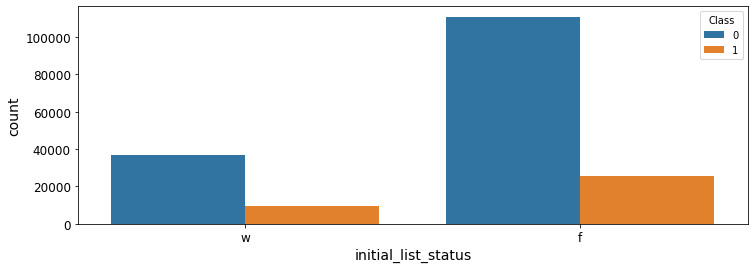

In [73]:
for var in ['verification_status', 'initial_list_status']:
    print()
    print(var)
    print(df_train[var].value_counts())
    plt.figure(figsize=(12,4))
    sns.countplot(x=var, data=df_train, hue='Class')
    plt.show()

=> There is only one unique value in application_type, there is no necessary to use this field because all observations have the same value

In [74]:
verification_df = df_train[df_train['Class']==1].groupby("verification_status").count()['Class']
verification_fp = df_train[df_train['Class']==0].groupby("verification_status").count()['Class']
verification_ratio = verification_df/verification_fp
verification_ratio

verification_status
Not Verified      0.174
Source Verified   0.252
Verified          0.281
Name: Class, dtype: float64

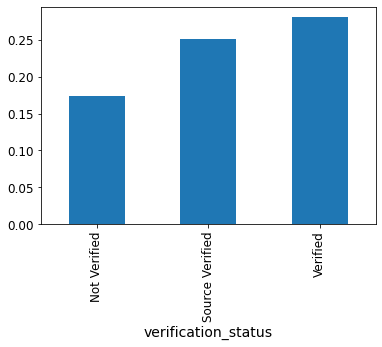

In [75]:
verification_ratio.plot(kind='bar')
plt.show()

#### addr_state & zip_code 

In [76]:
df_train.loc[df_train['zip_code'] == '945xx'].addr_state.value_counts()

CA    2383
Name: addr_state, dtype: int64

=> As state and zip_code provie the same information about the location, but zip_code provides more detail with specific are. So, we can remove state and use only zip_code to get loaction information

In [77]:
print(df_train['zip_code'].nunique())
print(df_train['zip_code'].astype(str).apply(lambda x:x[0:3]).nunique())

863
863


In [78]:
df_train['zip_code'] = df_train['zip_code'].astype(str).apply(lambda x:x[0:3])
zipcode_df = df_train[df_train['Class']==1].groupby("zip_code").count()['Class']
zipcode_fp = df_train[df_train['Class']==0].groupby("zip_code").count()['Class']
zipcode_ratio = zipcode_df/zipcode_fp

#### Encode cat vars

In [79]:
for var in ['sub_grade', 'purpose', 'zip_code']:
    class_ratio = calculate_class_ratio(df_train, var)
    class_ratio_df = pd.DataFrame(class_ratio).reset_index(drop=False)
    class_ratio_df.columns = [var, var + '_ratio']
    class_ratio_df[var + '_ratio'] = class_ratio_df[var + '_ratio'].replace(np.nan, 0)
    df_train = df_train.merge(class_ratio_df, how='left', left_on = var, right_on=var)

In [80]:
print(df_train.shape)
df_train.head()

(182436, 34)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,delinq_2yrs,inq_last_6mths,Class,pub_rec_bin,term_num,num_emp_length,sub_grade_ratio,purpose_ratio,zip_code_ratio
0,5000,36 months,12.490,167.250,B,B5,author,1 year,OWN,28000.000,Not Verified,Oct-14,medical,Medical expenses,480,MI,20.870,Dec-99,8.000,0.000,4549,64.100,18.000,w,INDIVIDUAL,0,1.000,0,0,36,1.000,0.186,0.269,0.240
1,19375,60 months,22.700,542.860,E,E5,Muckleshoot Gaming Commission,< 1 year,MORTGAGE,150000.000,Verified,Sep-13,medical,Surgery Expenses,980,WA,9.200,Jan-03,12.000,0.000,4390,27.600,38.000,w,INDIVIDUAL,0,1.000,0,0,60,0.500,0.637,0.269,0.188
2,10800,60 months,16.200,263.790,C,C4,Murphy Tractor and Equipment Company,10+ years,RENT,60000.000,Source Verified,Sep-13,debt_consolidation,Consolidate,640,MO,25.960,Jun-90,8.000,0.000,10923,68.300,31.000,f,INDIVIDUAL,0,1.000,0,0,60,10.000,0.308,0.248,0.222
3,5000,36 months,11.360,164.560,B,B5,Bank of America,< 1 year,RENT,40000.000,Source Verified,May-10,other,Loan for MBA at Texas Tech University,342,FL,11.420,Mar-02,10.000,0.000,4208,50.700,17.000,f,INDIVIDUAL,0,2.000,0,0,36,0.500,0.186,0.266,0.264
4,10000,60 months,16.450,245.580,E,E1,johns hopkins hospital,6 years,RENT,55000.000,Not Verified,Jun-10,major_purchase,miracle,212,MD,8.930,Aug-94,4.000,0.000,8045,79.700,9.000,f,INDIVIDUAL,0,0.000,0,0,60,6.000,0.495,0.166,0.240


#### Explore distribution of new numeric  vars

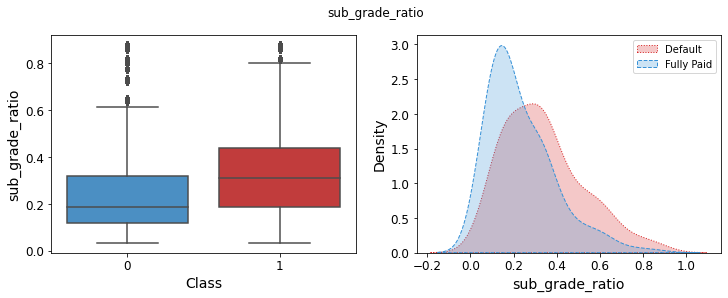

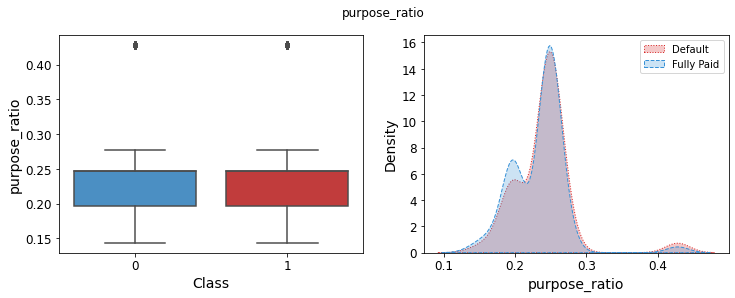

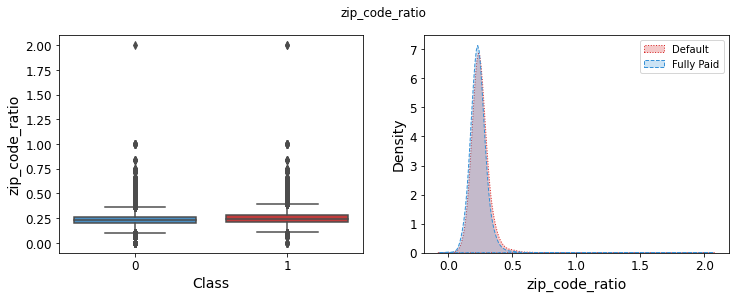

In [81]:
c1_df = df_train.loc[df_train.Class==1,:]
c0_df = df_train.loc[df_train.Class==0,:]
colors = ['#3791D7','#D72626']

for column in ['sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio']:
    plt.figure(figsize=[12,4])
    plt.suptitle(column, fontsize=12)
    plt.subplot(121)
    sns.boxplot(x='Class', y=column, data=df_train, palette=colors)
    plt.subplot(122)
    sns.kdeplot(c1_df[column], bw=0.4, label='Default', shade=True, color='#D72626', linestyle=":")
    sns.kdeplot(c0_df[column], bw=0.4, label='Fully Paid', shade=True, color='#3791D7', linestyle="--")
    plt.legend()
    plt.show()

**Note**: There exists outliers in zip_code_ratio, this may affect the results of models such as logistic regression which is very sensitive with outliers due to reducing value of loss function by costing coefficient values. In order to prevent this issue, applying technique to eliviate outliers should be considered. This can be verified in part 3 - Predictive  Model

In [82]:
df_temp = df_train.copy()
outlier_vars = ['zip_code_ratio']
for var in outlier_vars:
    print()
    print(var)
    upper_boundary, lower_boundary = find_skewed_boundaries(df_temp[var], 4)
    df_temp.loc[df_temp[var] <= lower_boundary, var] = lower_boundary
    df_temp.loc[df_temp[var] >= upper_boundary, var] = upper_boundary


zip_code_ratio
upper_boundary, lower_boundary:  0.5432098765432098 -0.07901234567901239
total number of var: 182436
number of data points with more than upper_boundary (right end outliers): 333
number of data points with less than lower_boundary (left end outliers: 0
% right end outliers: 0.0018252976386239558
% left end outliers: 0.0


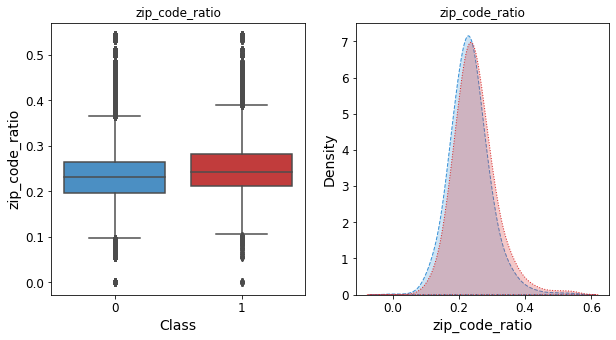

In [83]:
c0_df = df_temp.loc[df_temp.Class == 1,:]
c1_df =  df_temp.loc[df_temp.Class == 0,:]
colors = ['#3791D7','#D72626']

for column_header in outlier_vars:    
    plt.figure(figsize=[10,5])
    plt.subplot(121)
    sns.boxplot(x='Class', y=column_header,data=df_temp,palette=colors)
    plt.title(column_header, fontsize=12)
    plt.subplot(122)
    sns.kdeplot(c1_df[column_header], bw = 0.4, label = "Fully Paid", shade=True, color='#3791D7', linestyle="--")
    sns.kdeplot(c0_df[column_header], bw = 0.4, label = "Charged Off", shade=True, color= '#D72626', linestyle=":")
    plt.title(column_header, fontsize=12)
    plt.show()

### <font color=blue> 5.9. Univariate Analysis - Explore Temporal Vars

#### issue_d_date

In [84]:
df_train['issue_d'] = pd.to_datetime(df_train['issue_d'], format='%b-%y')
df_train['issue_d'] = pd.to_datetime(df_train.issue_d)
df_train.groupby(['issue_d', 'grade'])['loan_amnt'].sum().unstack().head(6)

grade,A,B,C,D,E,F,G
issue_d,,,,,,,
2007-06-01,NaN,NaN,NaN,NaN,7500.000,NaN,NaN
2007-07-01,48650.000,18500.000,58450.000,NaN,NaN,2700.000,NaN
2007-08-01,34500.000,30900.000,22625.000,10900.000,20000.000,25000.000,NaN
2007-09-01,26500.000,56625.000,27925.000,17850.000,NaN,NaN,NaN
2007-10-01,36100.000,29950.000,77125.000,28600.000,50175.000,NaN,NaN
2007-11-01,56950.000,107700.000,110100.000,25000.000,1500.000,NaN,NaN


Text(0, 0.5, 'Loan amount (US Dollars)')

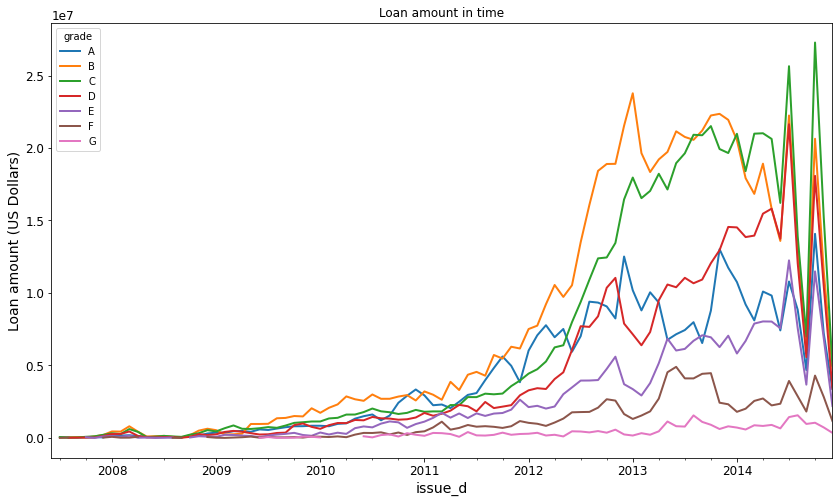

In [85]:
fig = df_train.groupby(['issue_d', 'grade'])['loan_amnt'].sum().unstack().sort_index().plot(figsize=(14,8), linewidth=2)
fig.set_title('Loan amount in time')
fig.set_ylabel('Loan amount (US Dollars)')

Lending Club seems to have increased the amount of money lent from 2013 onwards. The tendency indicates that they continue to grow. In addition, we can see that their major business comes from lending money to C and B grades.

'A' grades are the lower risk borrowers, borrowers that most likely will be able to repay their loans, as they are typically in a better financial situation. Borrowers within this grade are charged lower interest rates.

E, F and G grades represent the riskier borrowers. Usually borrowers in somewhat tighter financial situations, or for whom there is not sufficient financial history to make a reliable credit assessment. They are typically charged higher rates, as the business, and therefore the investors, take a higher risk when lending them money.

In [86]:
df_train['Month'] = df_train['issue_d'].dt.month
df_train['Day'] = df_train['issue_d'].dt.day
df_train['Year'] = df_train['issue_d'].dt.year
df_train['Hour'] = df_train['issue_d'].dt.hour
df_train['weekday'] = df_train['issue_d'].dt.weekday

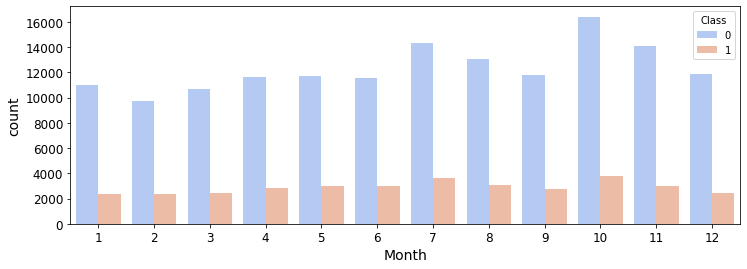

In [87]:
plt.figure(figsize=(12,4))
month_order = sorted(df_train['Month'].unique())
sns.countplot(x='Month', data=df_train, order=month_order, palette='coolwarm', hue='Class')
plt.show()

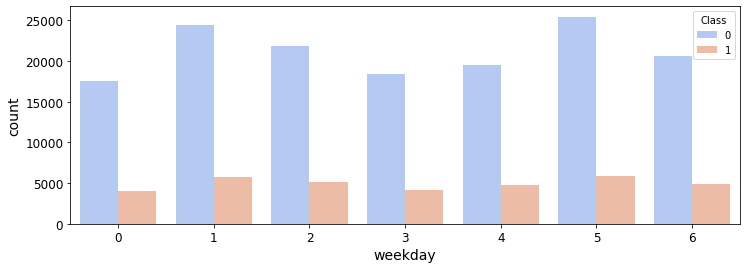

In [88]:
plt.figure(figsize=(12,4))
weekday_order = sorted(df_train['weekday'].unique())
sns.countplot(x='weekday', data=df_train, order=weekday_order, palette='coolwarm', hue='Class')
plt.show()

#### earliest_cr_line

In [89]:
df_train[['issue_d','earliest_cr_line']].head()

,issue_d,earliest_cr_line
0,2014-10-01,Dec-99
1,2013-09-01,Jan-03
2,2013-09-01,Jun-90
3,2010-05-01,Mar-02
4,2010-06-01,Aug-94


In [90]:
df_train['earliest_cr_line'] = pd.to_datetime(df_train['earliest_cr_line'], format = '%b-%y')
df_train['earliest_cr_line'] = pd.to_datetime(df_train.earliest_cr_line)

df_train['earliest_cr_year'] = df_train['earliest_cr_line'].dt.year
df_train['issue_d_year'] = df_train['issue_d'].dt.year

df_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,delinq_2yrs,inq_last_6mths,Class,pub_rec_bin,term_num,num_emp_length,sub_grade_ratio,purpose_ratio,zip_code_ratio,Month,Day,Year,Hour,weekday,earliest_cr_year,issue_d_year
0,5000,36 months,12.490,167.250,B,B5,author,1 year,OWN,28000.000,Not Verified,2014-10-01,medical,Medical expenses,480,MI,20.870,1999-12-01,8.000,0.000,4549,64.100,18.000,w,INDIVIDUAL,0,1.000,0,0,36,1.000,0.186,0.269,0.240,10,1,2014,0,2,1999,2014
1,19375,60 months,22.700,542.860,E,E5,Muckleshoot Gaming Commission,< 1 year,MORTGAGE,150000.000,Verified,2013-09-01,medical,Surgery Expenses,980,WA,9.200,2003-01-01,12.000,0.000,4390,27.600,38.000,w,INDIVIDUAL,0,1.000,0,0,60,0.500,0.637,0.269,0.188,9,1,2013,0,6,2003,2013
2,10800,60 months,16.200,263.790,C,C4,Murphy Tractor and Equipment Company,10+ years,RENT,60000.000,Source Verified,2013-09-01,debt_consolidation,Consolidate,640,MO,25.960,1990-06-01,8.000,0.000,10923,68.300,31.000,f,INDIVIDUAL,0,1.000,0,0,60,10.000,0.308,0.248,0.222,9,1,2013,0,6,1990,2013
3,5000,36 months,11.360,164.560,B,B5,Bank of America,< 1 year,RENT,40000.000,Source Verified,2010-05-01,other,Loan for MBA at Texas Tech University,342,FL,11.420,2002-03-01,10.000,0.000,4208,50.700,17.000,f,INDIVIDUAL,0,2.000,0,0,36,0.500,0.186,0.266,0.264,5,1,2010,0,5,2002,2010
4,10000,60 months,16.450,245.580,E,E1,johns hopkins hospital,6 years,RENT,55000.000,Not Verified,2010-06-01,major_purchase,miracle,212,MD,8.930,1994-08-01,4.000,0.000,8045,79.700,9.000,f,INDIVIDUAL,0,0.000,0,0,60,6.000,0.495,0.166,0.240,6,1,2010,0,1,1994,2010


Text(0, 0.5, 'Loan amount (US Dollars)')

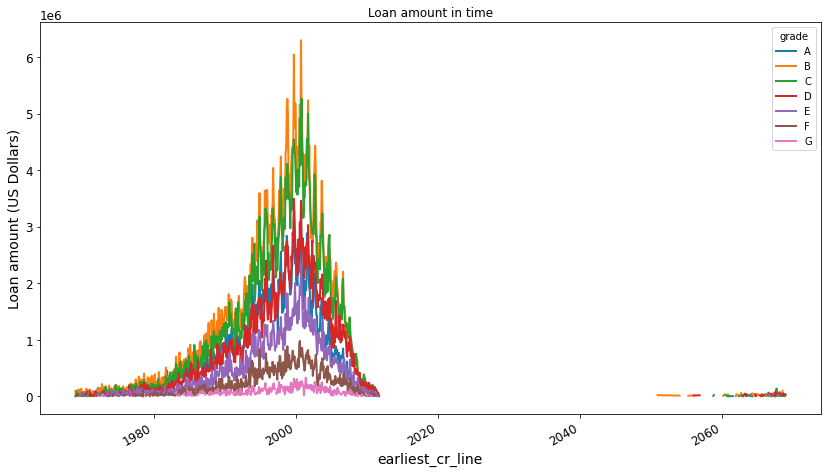

In [91]:
fig = df_train.groupby(['earliest_cr_line', 'grade'])['loan_amnt'].sum().unstack().sort_index().plot(figsize=(14,8), linewidth=2)
fig.set_title('Loan amount in time')
fig.set_ylabel('Loan amount (US Dollars)')

In [92]:
df_train['num_of_year'] = df_train['issue_d_year'] - df_train['earliest_cr_year']
df_train['num_of_days'] = df_train['issue_d'] - df_train['earliest_cr_line']
df_train['num_of_days'] = df_train['num_of_days'].apply(lambda x: x.days)

In [93]:
print(df_train.shape)
df_train.head()

(182436, 43)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,delinq_2yrs,inq_last_6mths,Class,pub_rec_bin,term_num,num_emp_length,sub_grade_ratio,purpose_ratio,zip_code_ratio,Month,Day,Year,Hour,weekday,earliest_cr_year,issue_d_year,num_of_year,num_of_days
0,5000,36 months,12.490,167.250,B,B5,author,1 year,OWN,28000.000,Not Verified,2014-10-01,medical,Medical expenses,480,MI,20.870,1999-12-01,8.000,0.000,4549,64.100,18.000,w,INDIVIDUAL,0,1.000,0,0,36,1.000,0.186,0.269,0.240,10,1,2014,0,2,1999,2014,15,5418
1,19375,60 months,22.700,542.860,E,E5,Muckleshoot Gaming Commission,< 1 year,MORTGAGE,150000.000,Verified,2013-09-01,medical,Surgery Expenses,980,WA,9.200,2003-01-01,12.000,0.000,4390,27.600,38.000,w,INDIVIDUAL,0,1.000,0,0,60,0.500,0.637,0.269,0.188,9,1,2013,0,6,2003,2013,10,3896
2,10800,60 months,16.200,263.790,C,C4,Murphy Tractor and Equipment Company,10+ years,RENT,60000.000,Source Verified,2013-09-01,debt_consolidation,Consolidate,640,MO,25.960,1990-06-01,8.000,0.000,10923,68.300,31.000,f,INDIVIDUAL,0,1.000,0,0,60,10.000,0.308,0.248,0.222,9,1,2013,0,6,1990,2013,23,8493
3,5000,36 months,11.360,164.560,B,B5,Bank of America,< 1 year,RENT,40000.000,Source Verified,2010-05-01,other,Loan for MBA at Texas Tech University,342,FL,11.420,2002-03-01,10.000,0.000,4208,50.700,17.000,f,INDIVIDUAL,0,2.000,0,0,36,0.500,0.186,0.266,0.264,5,1,2010,0,5,2002,2010,8,2983
4,10000,60 months,16.450,245.580,E,E1,johns hopkins hospital,6 years,RENT,55000.000,Not Verified,2010-06-01,major_purchase,miracle,212,MD,8.930,1994-08-01,4.000,0.000,8045,79.700,9.000,f,INDIVIDUAL,0,0.000,0,0,60,6.000,0.495,0.166,0.240,6,1,2010,0,1,1994,2010,16,5783


### <font color=blue> 5.10. Multivariate Analysis

#### Correlation Matrix

In [94]:
corr_mat = df_train[num_vars + ['Class']].corr()
corr_mat

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,delinq_2yrs,inq_last_6mths,Class
loan_amnt,1.000,0.211,0.956,0.347,0.057,0.201,-0.074,0.337,0.101,0.234,0.000,0.014,0.065
int_rate,0.211,1.000,0.202,-0.019,0.171,0.044,0.088,0.027,0.360,-0.006,0.056,0.216,0.246
installment,0.956,0.202,1.000,0.343,0.059,0.199,-0.063,0.329,0.132,0.217,0.008,0.027,0.048
annual_inc,0.347,-0.019,0.343,1.000,-0.176,0.150,-0.021,0.328,0.023,0.221,0.032,0.064,-0.063
dti,0.057,0.171,0.059,-0.176,1.000,0.311,-0.036,0.159,0.228,0.233,0.000,0.007,0.119
open_acc,0.201,0.044,0.199,0.150,0.311,1.000,-0.014,0.235,-0.105,0.670,0.034,0.113,0.019
pub_rec,-0.074,0.088,-0.063,-0.021,-0.036,-0.014,1.000,-0.103,-0.054,0.027,0.000,0.043,0.007
revol_bal,0.337,0.027,0.329,0.328,0.159,0.235,-0.103,1.000,0.235,0.217,-0.022,-0.010,-0.005
revol_util,0.101,0.360,0.132,0.023,0.228,-0.105,-0.054,0.235,1.000,-0.085,-0.006,-0.093,0.093
total_acc,0.234,-0.006,0.217,0.221,0.233,0.670,0.027,0.217,-0.085,1.000,0.079,0.143,-0.027


<AxesSubplot:>

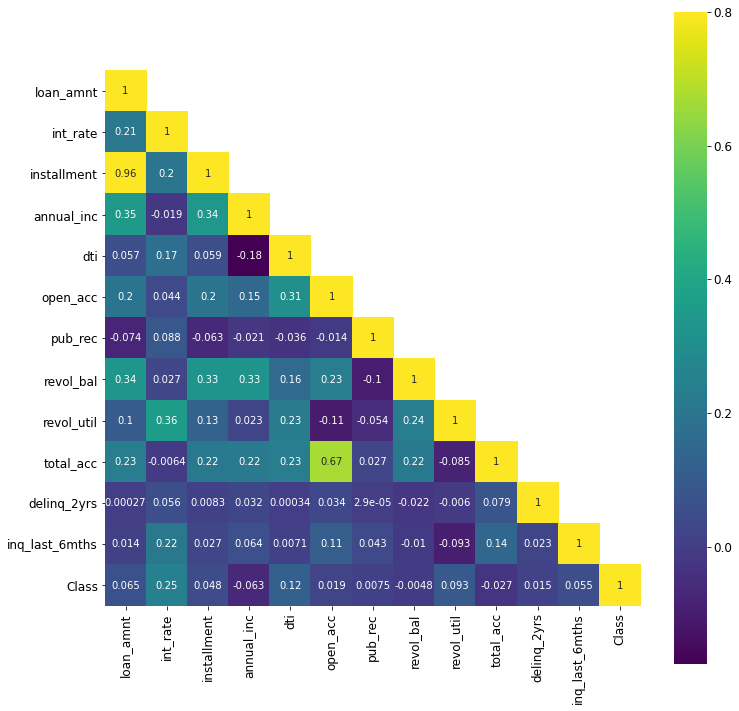

In [95]:
#corr_matt = df_train[num_vars + ['sub_grade_ratio', 'purpose_ratio', 'zip_code_ratio'] + ['Class']].corr()
mask = np.array(corr_mat)
mask[np.tril_indices_from(mask)] = False
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, mask=mask, vmax=.8, square=True, annot=True,  cmap='viridis')

We can see various relationships between the features and obviously you would get a perfect correlation along the diagonal. You should have noticed almost perfect relationship between loan_amnt and installment

#### the correlation of the numeric features to the new loan_repaid column

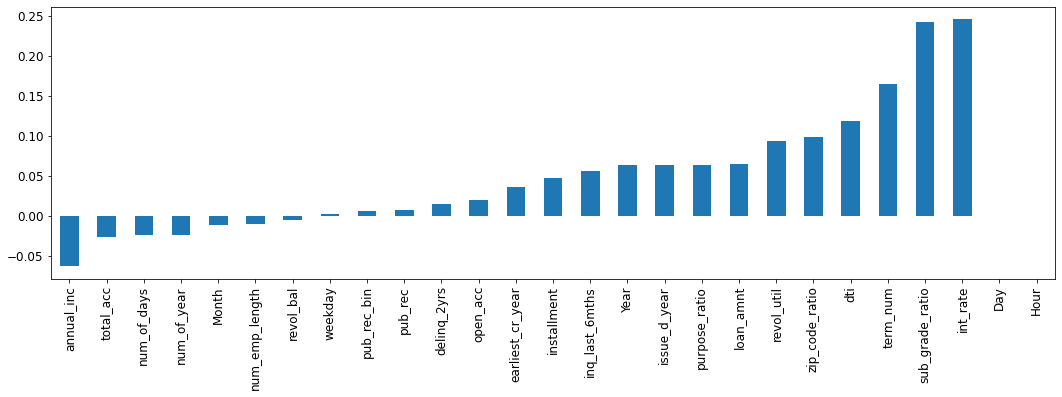

In [96]:
plt.figure(figsize = (18,5))
df_train.corr()['Class'].sort_values().drop('Class').plot(kind='bar')
plt.show()

### <font color=blue> 5.11. More visualization to understand more about the business

#### Examine distribution plot of loan_amnt

(0.0, 45000.0)

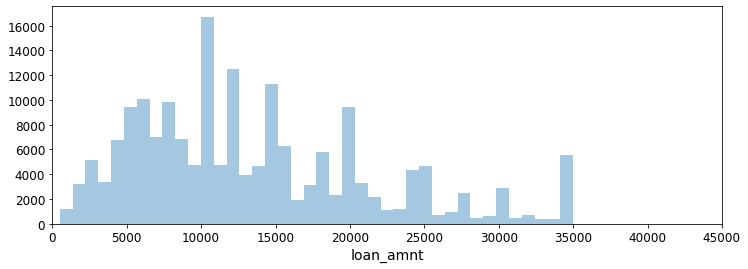

In [97]:
plt.figure(figsize=(12,4))
sns.distplot(df_train['loan_amnt'], kde=False, bins=40)
plt.xlim(0,45000)

The values of the variable vary across the entire range of loan amounts typically disbursed to borrowers. This is characteristic of continuous variables.

**Note**: The taller bars correspond to loan sizes of 10000, 15000, 20000, and 35000, indicating that there are more loans disbursed for those loan amount values. Likely, these particular loan amount values are offered as a default in the Lending Club website. Less frequent loan values, like 23,000 or 33,000 are typically requested by people who require a specific amount of money for a definite purpose.

Something to notice here is these spikes happening at these even money amounts which kind of make sense. So clearly these spikes are happening at something like an even ten thousand dollar alone instead of a spike at something like an even ten thousand dollar alone instead of a spike at some random value like eight thousand three hundred and thirty three. So that's what these little spikes are essentially indicating that there are certain amounts that are standard loans.

#### Perform a scatter plot. Dose this relationship make sense? Is there duplicated information here?

It's pretty much makes sense that the installments and the actual loan amount would be extremely correlated because they're essentially correlated bby some sort of internal formula that this company uses. if you loan someone out one million dollars you would expect that following some formula your payments your monthly payment instalments are going to be quite high and you'll probably use that same formula even if you loan someone a thousand dollars and then those payments will be likely much less.

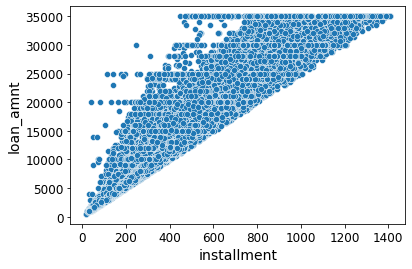

In [98]:
sns.scatterplot(x='installment', y='loan_amnt', data=df_train)
plt.show()

Interest rate has essentially the highest negative correlation with whether or not someones's goting to repay their loan which kind of makes sense. Maybe if you have an extremely high interest rate you're going to find it harder to pay of that loan.

#### Create a boxplot showing the relationship between the loan_status and loan_amnt

This is to answer the question if there is a relationship between maybe really expensive loans and not being able to pay them off or very low amount and the fully paying those off

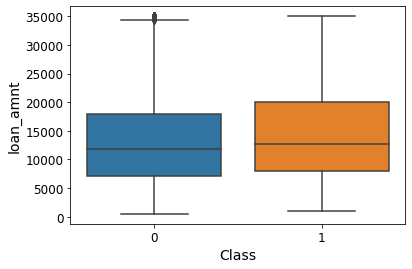

In [99]:
sns.boxplot(x='Class', y='loan_amnt', data=df_train)
plt.show()

In general, it looks like that pretty similar, box plot of charged off loans is slightly higher meaning that if our loan amount is higher we have a slight increase in the likelihood of it of it being charged off which again intuitively makes sense for it's harder to pay back than smaller loan. So they are extremely similar here, so this isn't a key indicator of whether or not someone's going to payoff their loan

#### Calculate the summary statistics for the loan amount, grouped by the loan_status

In [100]:
df_train.groupby(['Class'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,147845.000,13209.454,7950.651,500.000,7100.000,11750.000,18000.000,35000.000
1,34591.000,14544.227,8355.983,1000.000,8000.000,12625.000,20000.000,35000.000


This essentially shows us the quantitative numbers behind this box plot. So if you ever get a case like this that the box plot is a little hard to read, you can always compare the average here. So you can see the charged off average price is a little higher than the fully paid loan. So again all this is indicating is the averages of the loans for people that aren't able to pay them back are slightly higher than the averages for people that do pay off their loans

Text(0, 0.5, 'Number of Customers')

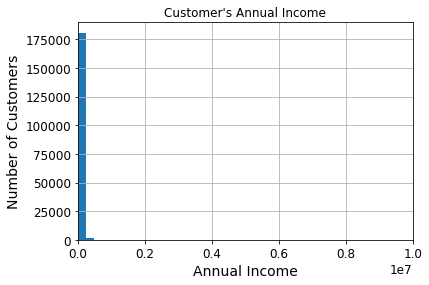

In [101]:
# Now, let's explore the income declared by the customers,
# that is, how much they earn yearly.

# this variable is also continuous

fig = df_train.annual_inc.hist(bins=30)

# for better visualisation, I display only specific
# range in the x-axis
fig.set_xlim(0, 10000000)

# title and axis legends
fig.set_title("Customer's Annual Income")
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers')

The majority of salaries are concentrated towards values in the range 30-70k, with only a few customers earning higher salaries. The values of the variable, vary continuously across the variable range, because this is a continuous variable.

In [102]:
df_train.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,purpose,title,zip_code,addr_state,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,delinq_2yrs,inq_last_6mths,Class,pub_rec_bin,term_num,num_emp_length,sub_grade_ratio,purpose_ratio,zip_code_ratio,Month,Day,Year,Hour,weekday,earliest_cr_year,issue_d_year,num_of_year,num_of_days
0,5000,36 months,12.490,167.250,B,B5,author,1 year,OWN,28000.000,Not Verified,2014-10-01,medical,Medical expenses,480,MI,20.870,1999-12-01,8.000,0.000,4549,64.100,18.000,w,INDIVIDUAL,0,1.000,0,0,36,1.000,0.186,0.269,0.240,10,1,2014,0,2,1999,2014,15,5418
1,19375,60 months,22.700,542.860,E,E5,Muckleshoot Gaming Commission,< 1 year,MORTGAGE,150000.000,Verified,2013-09-01,medical,Surgery Expenses,980,WA,9.200,2003-01-01,12.000,0.000,4390,27.600,38.000,w,INDIVIDUAL,0,1.000,0,0,60,0.500,0.637,0.269,0.188,9,1,2013,0,6,2003,2013,10,3896
2,10800,60 months,16.200,263.790,C,C4,Murphy Tractor and Equipment Company,10+ years,RENT,60000.000,Source Verified,2013-09-01,debt_consolidation,Consolidate,640,MO,25.960,1990-06-01,8.000,0.000,10923,68.300,31.000,f,INDIVIDUAL,0,1.000,0,0,60,10.000,0.308,0.248,0.222,9,1,2013,0,6,1990,2013,23,8493
3,5000,36 months,11.360,164.560,B,B5,Bank of America,< 1 year,RENT,40000.000,Source Verified,2010-05-01,other,Loan for MBA at Texas Tech University,342,FL,11.420,2002-03-01,10.000,0.000,4208,50.700,17.000,f,INDIVIDUAL,0,2.000,0,0,36,0.500,0.186,0.266,0.264,5,1,2010,0,5,2002,2010,8,2983
4,10000,60 months,16.450,245.580,E,E1,johns hopkins hospital,6 years,RENT,55000.000,Not Verified,2010-06-01,major_purchase,miracle,212,MD,8.930,1994-08-01,4.000,0.000,8045,79.700,9.000,f,INDIVIDUAL,0,0.000,0,0,60,6.000,0.495,0.166,0.240,6,1,2010,0,1,1994,2010,16,5783


In [103]:
df_train.shape

(182436, 43)

---
---
[content table](#content_table)
<a id="summary"></a>
# <font color=red> 6. Summary
    
Afer performing Exploratory Data Analysis step, we now have knowledge and strategies to prepare the data for Machine Learning algorithms. For this dataset, the following tasks will be applied to transform data:
    
**Tasks for processing step**

1. Remove vars: grade, title, installment
2. Numeric data:
    + inq_last_6mths: combine value 7 & 8 into 7
    + pub_rec_bin: 0 if the  pub_rec <= 3, 1 otherwise
    + delinq_2yrs_bin: 0 if the  pub_rec <= 3, 1 otherwise
4. Categorical data:
    + Convert ordinal data to numeric data: term, emp_length
    + Encode cat vars - calculate class ratio: ['sub_grade', 'purpose', 'zip_code']
    + Encode cat vars - create dummy vars []
5. temporal vars:
    + convert obj var to date time var: issue_d, earliest_cr_line
    + num_of_year
    + num_of_day
6. Handling missing data:
    + numeric data
    + categorical var
7. Scaling num var
8. Handling outliers
9. Processing Text var